In [103]:
%reload_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
from dops import *

In [26]:
def generate_data(u, theta, C, n, k):
    S = np.zeros((n, len(u)))
    z = np.zeros(n)
    for i in range(n):
        features = np.random.choice(u, size=k, replace=False)
        S[i] = np.array([1 if j in features else 0 for j in u])
        cs = []
        for f in features:
            for j, l in enumerate(C[f]):
                if l == 1 and j not in cs:
                    cs.append(j)
        z[i] = np.sum(theta[cs])
    return S, z

def two_largest(l):
    index1, index2, first, second = 0, 0, None, None
    for i, e in enumerate(l):
        if first == None or e >= first:
            first = e
            index1 = i
        elif second == None or second < e:
            second = e
            index2 = i
    return [index1, index2]

In [135]:
preds = []
truth = []
t1 = time.time()
for _ in range(10):
    k = 5
    d = 20
    u = np.arange(d)
    theta = np.random.randint(100, size=d)
    C = np.zeros((d,d))
    for i in range(d):
        features = np.random.choice(u, size=np.random.randint(1,8), replace=False)
        C[i][features] = 1
    S, z = generate_data(u, theta, C, 180, k)
    T, v = generate_data(u, theta, C, 10, k)
    res, pred_theta, max_item = dops(S, z, T, C, 10, 0.9, np.zeros(d), batch_size=5, eta=0.1, iters=150, print_every=100)
    preds.append(res)
    truth.append(v)
t2 = time.time()
print(t2-t1)

Iter 100, theta: [0.9822728  1.18966867 0.98976855 0.98394954 0.89746811 0.98744161
 0.96359115 0.95718054 0.83330687 0.92029524 0.92504571 1.00873838
 1.04116858 0.93386275 0.96118039 0.98767177 0.98981755 1.00040928
 0.91548294 0.98466629], gradient: [-0.16784504 -0.11518296 -0.01136827 -0.01783385 -0.03985025 -0.01395377
  0.08547165 -0.01054014  0.1036743   0.04477249  0.15375449 -0.01992032
  0.09018731  0.23762528 -0.10979956  0.00111678 -0.00390642 -0.18473043
  0.07646252 -0.01703746]
Iter 100, theta: [0.97842346 0.94418844 1.00683636 0.99997344 0.98019205 0.96271707
 0.89451085 0.99202971 0.97472315 0.99706685 0.96920492 0.95658002
 0.90399041 0.99997344 0.99507057 0.90609456 0.98687054 0.97917844
 0.97098922 0.95075634], gradient: [-1.53603564e-01 -9.90498772e-02  8.16700328e-02 -2.95126654e-05
 -3.49031193e-03  6.96856376e-02 -1.72765723e-01  2.81811569e-02
  8.30257213e-02  3.37779809e-02 -2.56438978e-01 -1.12073879e-02
  7.85078664e-02 -2.95126654e-05  6.85969329e-02  1.91

In [136]:
pred = []
real = []
rand = []
for i in range(10):
    pred.append(truth[i][np.argmax(preds[i])])
    real.append(max(truth[i]))
    rand.append(np.median(truth[i]))

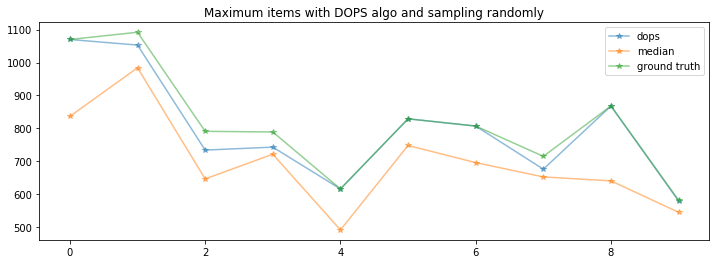

In [137]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(0,10), pred, '*-', alpha=0.5, label='dops')
plt.plot(np.arange(0,10), rand, '*-', alpha=0.5, label='median')
plt.plot(np.arange(0,10), real, '*-', alpha=0.5, label='ground truth')
plt.legend()
plt.title('Maximum items with DOPS algo and sampling randomly')
plt.show()